# Machine Learning parte 1: otimização de modelos através de hiperparâmetros

* Este estudo é uma continuação do estudo de [Validação Cruzada](https://colab.research.google.com/drive/15ibd-svawLuSqctiV9153p4tvtfPCv1A?usp=sharing).

# Abertura do dataset e itens do projeto anterior

In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [2]:
# simulação de uma péssima organização dos dados
dados_azar = dados.sort_values('vendido', ascending = True)
x_azar = dados_azar[['preco', 'idade_do_modelo', 'km_por_ano']]
y_azar = dados_azar['vendido']

In [3]:
# modelo baseline
import numpy as np
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

SEED = 301
np.random.seed(SEED)

dummy_stratified = DummyClassifier()
results = cross_validate(dummy_stratified, x_azar, y_azar, cv = 10)

media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print(f'Accuracy mean = {media*100:.2f}%')
print(f'Accuracy interval = [{(media - 2*desvio_padrao)*100 :.2f}%, {(media + 2*desvio_padrao)*100 :.2f}%]')

Accuracy mean = 58.00%
Accuracy interval = [58.00%, 58.00%]


In [4]:
# 1º MODELO Decision Tree
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

model_decisiontree = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(model_decisiontree, x_azar, y_azar, cv = 10)

media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print(f'Accuracy mean = {media*100:.2f}%')
print(f'Accuracy interval = [{(media - 2*desvio_padrao)*100 :.2f}%, {(media + 2*desvio_padrao)*100 :.2f}%]')

Accuracy mean = 75.78%
Accuracy interval = [73.83%, 77.73%]


In [5]:
# gerando dados aleatórios de modelo de carro para simulação de agrupamento ao usar o estimador
np.random.seed(SEED)
dados['modelo'] = dados['idade_do_modelo'] + np.random.randint(-2, 3, size=10000)
dados['modelo'] = dados['modelo'] + abs(dados['modelo'].min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [6]:
def imprime_resultados(results):
  media = results['test_score'].mean()
  desvio_padrao = results['test_score'].std()

  print(f'Accuracy mean = {media*100:.2f}%')
  print(f'Accuracy interval = [{(media - 2*desvio_padrao)*100 :.2f}%, {(media + 2*desvio_padrao)*100 :.2f}%]')

In [7]:
# 2º MODELO
# GroupKFold em um pipeline com StandardScaler e SVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
model_svc = SVC()

pipeline = Pipeline([('transformacao', scaler), ('estimador', model_svc)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados['modelo'], return_train_score=False)
imprime_resultados(results)

Accuracy mean = 76.68%
Accuracy interval = [74.28%, 79.08%]


# Variações no max_depth da Árvore de Decisão

* A Validação Cruzada gera 10 modelos diferentes para avaliação. Para o uso de fato, utilizamos todo o dataset que deve ser usado em um fit de fato.

## Profundidade 2

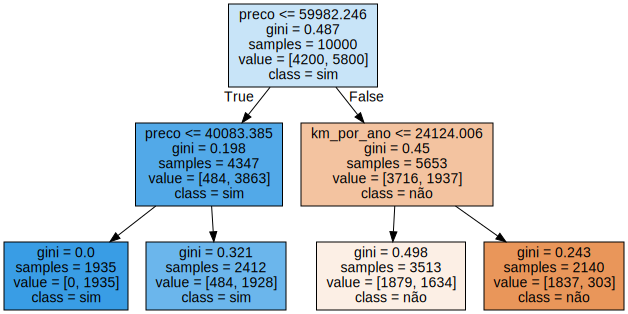

In [8]:
from sklearn.tree import export_graphviz
import graphviz

model_decisiontree.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(model_decisiontree, out_file = None, filled = True, class_names = ['não', 'sim'], feature_names = features)

graph = graphviz.Source(dot_data)
graph

## Profundidade 3

In [9]:
SEED = 301
np.random.seed(SEED)

model_decisiontree = DecisionTreeClassifier(max_depth = 3)
results = cross_validate(model_decisiontree, x_azar, y_azar, cv = 10)

media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print(f'Accuracy mean = {media*100:.2f}%')
print(f'Accuracy interval = [{(media - 2*desvio_padrao)*100 :.2f}%, {(media + 2*desvio_padrao)*100 :.2f}%]')

Accuracy mean = 78.70%
Accuracy interval = [75.87%, 81.53%]


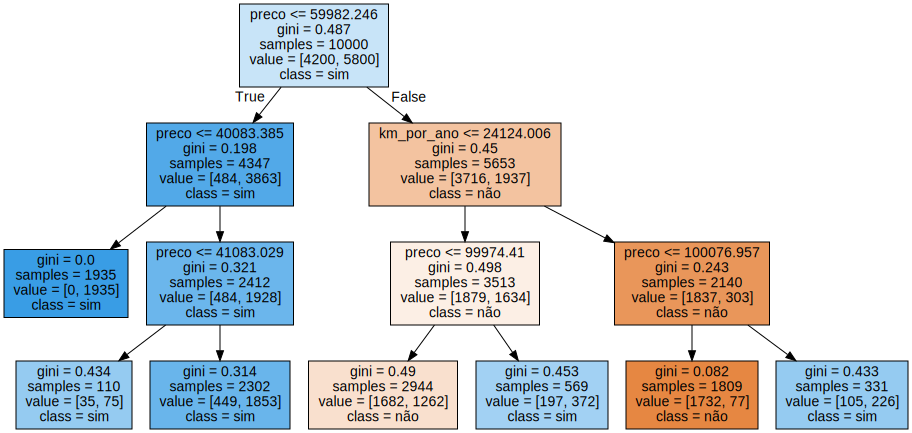

In [10]:
from sklearn.tree import export_graphviz
import graphviz

model_decisiontree.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(model_decisiontree, out_file = None, filled = True, class_names = ['não', 'sim'], feature_names = features)

graph = graphviz.Source(dot_data)
graph

## Profundidade 10

In [11]:
SEED = 301
np.random.seed(SEED)

model_decisiontree = DecisionTreeClassifier(max_depth = 10)
results = cross_validate(model_decisiontree, x_azar, y_azar, cv = 10)

media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print(f'Accuracy mean = {media*100:.2f}%')
print(f'Accuracy interval = [{(media - 2*desvio_padrao)*100 :.2f}%, {(media + 2*desvio_padrao)*100 :.2f}%]')

Accuracy mean = 77.03%
Accuracy interval = [73.81%, 80.25%]


* A acurácia foi menor do que com a profundidade máxima 3.

# Otimização de hiperparâmetro (max_depth)

## Teste de várias profundidades máximas

In [32]:
def roda_arvore_de_decisao(max_depth):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  model = DecisionTreeClassifier(max_depth = max_depth)
  results = cross_validate(model, x_azar, y_azar, cv = cv, groups = dados['modelo'], return_train_score = True)

  mean_test_score = results['test_score'].mean()
  mean_train_score = results['train_score'].mean()

  tabela = [max_depth, mean_train_score, mean_test_score]
  return tabela

In [34]:
resultados = pd.DataFrame([roda_arvore_de_decisao(i) for i in range(1, 33)], columns = ['max_depth', 'train', 'test'])

In [35]:
resultados.head(10)

,max_depth,train,test
0,1,0.757912,0.757842
1,2,0.757912,0.757842
2,3,0.787510,0.786726
3,4,0.787876,0.786328
4,5,0.789410,0.785559
5,6,0.791701,0.781233
6,7,0.794968,0.779632
7,8,0.798878,0.778580
8,9,0.804590,0.773770
9,10,0.811590,0.771942


* A Árvore começa a sofrer **overfit**, por isso o score do treino sempre aumenta, enquanto o score de teste começa a ser prejudicado.

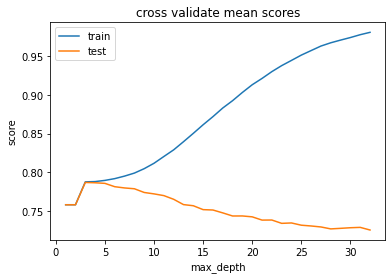

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(data = resultados, x = 'max_depth', y = 'train', label = 'train')
ax = sns.lineplot(data = resultados, x = 'max_depth', y = 'test', label = 'test')

ax.set_xlabel('max_depth')
ax.set_ylabel('score')
ax.set_title('cross validate mean scores')

plt.show()

In [16]:
resultados.sort_values('test', ascending = False).head(3)

,max_depth,train,test
2,3,0.787510,0.786726
3,4,0.787876,0.786328
4,5,0.789410,0.785559


* A árvore com melhor pontuação de treino foi construída com profundidade máxima 3.

# Exploração de 2 dimensões de hiperparâmetros

## Explorando todo um intervalo das duas dimensões [1,32] x [1,32]

* **max_depth** e **min_samples_leaf**
* Os cálculos de todo o espaço com 2 dimensões já apresenta aumento no tempo de processamento.
* Este aumento pode ser remediado com paralelismo.

In [36]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf):
  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  model = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf)
  results = cross_validate(model, x_azar, y_azar, cv = cv, groups = dados['modelo'], return_train_score = True)

  fit_time = results['fit_time'].mean()
  score_time = results['score_time'].mean()

  mean_test_score = results['test_score'].mean()
  mean_train_score = results['train_score'].mean()

  tabela = [max_depth, min_samples_leaf, mean_train_score, mean_test_score, fit_time, score_time]
  return tabela

In [18]:
#resultados_2d = []
#for max_depth in range(1, 33):
#  for min_samples_leaf in range(1, 33):
#    tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
#    resultados.append(tabela)
#
#resultados_2d = pd.DataFrame(resultados, columns = ['max_depth', 'min_samples_leaf', 'train', 'test', 'fit_time', 'score_time'])

In [19]:
#resultados_2d.sort_values('test', ascending = False).head()

## Explorando todo o intervalo de uma dimensão e uma parte da outra

* Explorando só uma parte do espaço de **min_samples_leaf**.

In [37]:
resultados = []
for max_depth in range(1, 33):
  for min_samples_leaf in [32, 64, 128, 256]:
    tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
    resultados.append(tabela)

resultados = pd.DataFrame(resultados, columns = ['max_depth', 'min_samples_leaf', 'train', 'test', 'fit_time', 'score_time'])

In [38]:
resultados.sort_values('test', ascending = False).head()

,max_depth,min_samples_leaf,train,test,fit_time,score_time
15,4,256,0.78751,0.786726,0.013701,0.002264
12,4,32,0.78751,0.786726,0.013823,0.002182
14,4,128,0.78751,0.786726,0.012937,0.002066
13,4,64,0.78751,0.786726,0.012874,0.002007
8,3,32,0.78751,0.786726,0.011174,0.002060


* Com o intervalo de [1,32] e com a variação do **min_samples_leaf** o melhor **max_depth** passou a ser 4. Antes, com o valor padrão 1 do algoritmo, o melhor era 3.

## Correlação

In [22]:
corr = resultados.corr().round(6)
corr

,max_depth,min_samples_leaf,train,test
max_depth,1.000000,-0.000000,0.536705,-0.027675
min_samples_leaf,-0.000000,1.000000,-0.409676,0.349011
train,0.536705,-0.409676,1.000000,0.116466
test,-0.027675,0.349011,0.116466,1.000000


* Quando mais alto o valor de correlação, mais os dois valores crescem juntos.

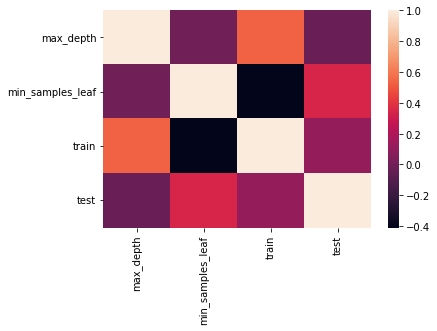

In [23]:
sns.heatmap(corr)

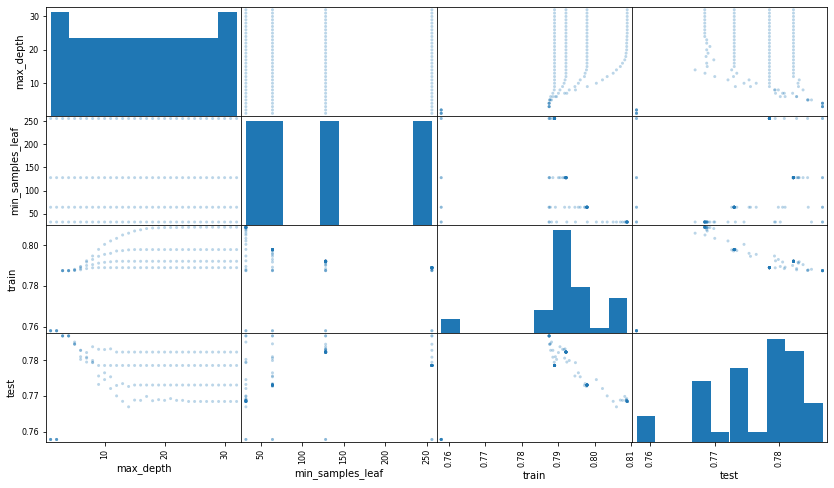

In [24]:
pd.plotting.scatter_matrix(resultados, figsize = (14, 8), alpha = 0.3)
plt.show()

* Diagonal: histogramas de valores.

* À medida que o max_depth aumenta, as ponturações de treino sobem, mas as de teste caem.

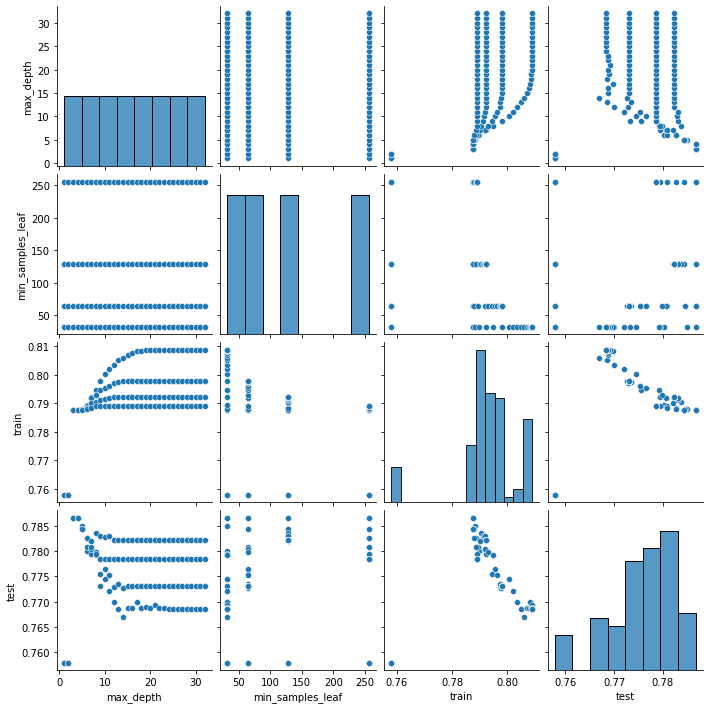

In [25]:
sns.pairplot(resultados)

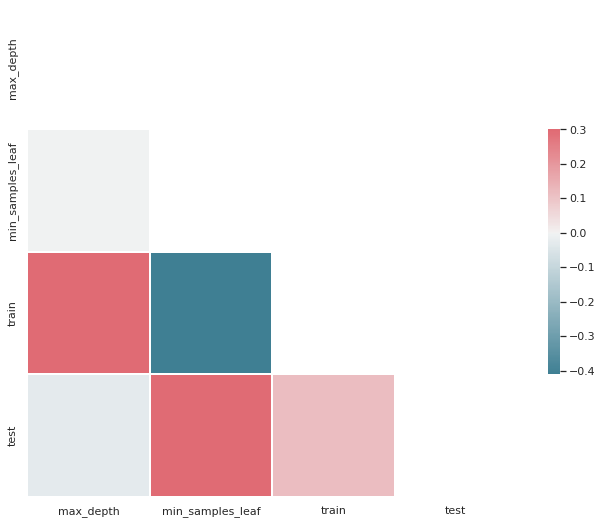

In [26]:
from string import ascii_letters

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

plt.show()

* O min_samples_leaf tem uma correlação positiva com a pontuação de teste, e o max_depth tem correlação positiva com a pontuação de treino. 

* Analisando esta correlação e partindo do objetivo de melhorar a acurácia dos testes, pode-se usar um intervalo pro min_samples_leaf que tenta a valores mais altos.

## Novo intervalo pro min_samples_leaf

In [39]:
resultados = []
for max_depth in range(1, 33):
  for min_samples_leaf in [128, 192, 256, 512]:
    tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
    resultados.append(tabela)

resultados = pd.DataFrame(resultados, columns = ['max_depth', 'min_samples_leaf', 'train', 'test', 'fit_time', 'score_time'])

In [40]:
corr = resultados.corr()

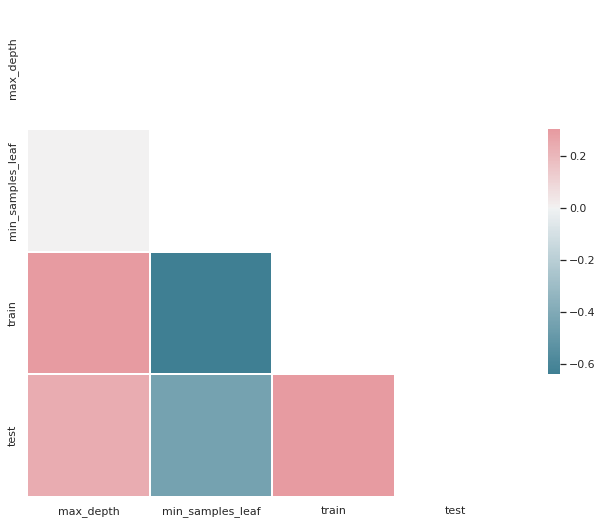

In [29]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

plt.show()

In [30]:
resultados.sort_values('test', ascending = False).head()

,max_depth,min_samples_leaf,train,test
13,4,192,0.78751,0.786726
8,3,128,0.78751,0.786726
9,3,192,0.78751,0.786726
10,3,256,0.78751,0.786726
14,4,256,0.78751,0.786726


* O **max_depth** se manteve em 4.
* O min_samples_leaf se alterou.

* Considerando apenas dois parâmetros, a busca por intervalos pode ser aceitável, mas dificilmente um modelo terá apenas 2.

# Otimização de hiperparâmetros com Grid Search Cross-Validation

## Resultados do GridSearchCV

* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

* Faz uma busca em forma de grid no espaço de hiperparâmetros.

* Esta é uma busca exaustiva, então não há economia de recursos em relação ao método de busca "manual" anterior. O GridSearchCV apenas facilita escrita e legibilidade de código.

In [44]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

# dicionário de parâmetros e seus conjuntos de valores
espaco_de_parametros = {
    'max_depth' : [3, 5],
    'min_samples_split' : [32, 64, 128],
    'min_samples_leaf' : [32, 64, 128],
    'criterion' : ['gini', 'entropy']
}

busca = GridSearchCV(
    DecisionTreeClassifier(),
    espaco_de_parametros,
    cv = GroupKFold(n_splits = 10)
)

# executa todo o processo, com divisões do cross-validate ao longo de todo o espaço de parâmetros, utilizando o algoritmo de aprendizagem escolhido
# cada combinação de valores de hiperparâmetros é validado 10x (escolhido no cv utilizando KFold) e tem sua própria média de pontuações
busca.fit(x_azar, y_azar, groups = dados['modelo'])
resultados = pd.DataFrame(busca.cv_results_)

* Melhores parâmetros

In [46]:
busca.best_params_

Melhores parâmetros:


{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 32,
 'min_samples_split': 32}

* Melhor pontuação

In [52]:
print('Melhor pontuação:')
print(f'{busca.best_score_*100:.2f}%')

Melhor pontuação:
78.67%


* Melhor estimador

In [53]:
busca.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

* Estes foram os melhores resultados dentro do espaço que foi escolhido para set testado, mas não necessariamente é o melhor possível.

## Predição direta com o modelo indicado (incorreto)

In [55]:
from sklearn.metrics import accuracy_score
melhor = busca.best_estimator_

predicoes = melhor.predict(x_azar)
accuracy = accuracy_score(predicoes, y_azar)

print(f'Accuracy para os dados foi {accuracy*100:.2f}%')

Accuracy para os dados foi 78.75%


* Utlizar diretamente o modelo indicado pelo GridSearchCV na base inteira de dados é uma visão otimista, pois há apenas uma reafirmação com os dados que foram usados no próprio treinamento.

* https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html

* No caso de cross-validation com busca de hiperparâmetros, faz-se uma nova validação cruzada.

## Nested cross-validation (mais indicado)

* O Pandas ainda não suporta cross-validation com GroupKFold. Portanto não é possível prever os resultados para novos grupos.

* Por enquanto, a solução é utilizar apenas o KFold.

In [58]:
from sklearn.model_selection import cross_val_score
#scores = cross_val_score(busca, x_azar, y_azar, cv = GroupKFold(n_splits = 10), groups = dados['modelo'])

In [64]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

# dicionário de parâmetros e seus conjuntos de valores
espaco_de_parametros = {
    'max_depth' : [3, 5],
    'min_samples_split' : [32, 64, 128],
    'min_samples_leaf' : [32, 64, 128],
    'criterion' : ['gini', 'entropy']
}

busca = GridSearchCV(
    DecisionTreeClassifier(),
    espaco_de_parametros,
    cv = KFold(n_splits = 5, shuffle = True)
)

# executa todo o processo, com divisões do cross-validate ao longo de todo o espaço de parâmetros, utilizando o algoritmo de aprendizagem escolhido
# cada combinação de valores de hiperparâmetros é validado 10x (escolhido no cv utilizando KFold) e tem sua própria média de pontuações
busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)

In [65]:
scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits = 5, shuffle = True))

In [66]:
scores

array([0.7895, 0.7825, 0.7905, 0.7715, 0.7995])

In [67]:
media = scores.mean()
desvio_padrao = scores.std()

print(f'Accuracy mean = {media*100:.2f}%')
print(f'Accuracy interval = [{(media - 2*desvio_padrao)*100 :.2f}%, {(media + 2*desvio_padrao)*100 :.2f}%]')

Accuracy mean = 78.67%
Accuracy interval = [76.80%, 80.54%]


In [70]:
melhor_estimador = busca.best_estimator_
melhor_estimador

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

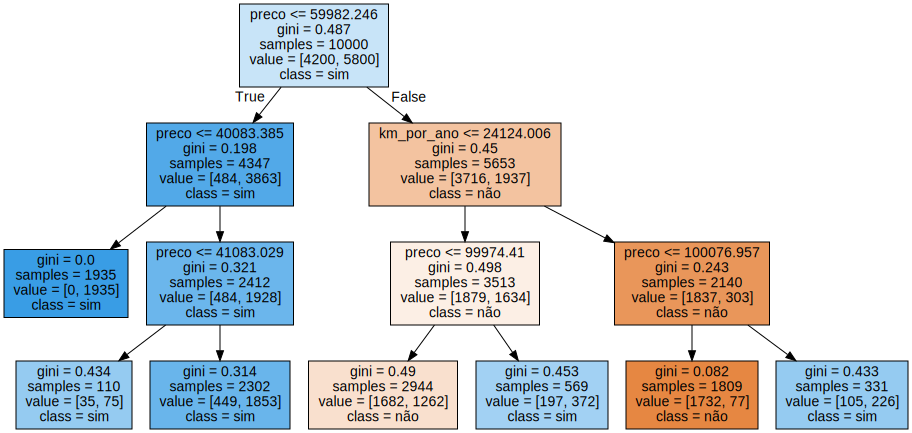

In [71]:
features = x_azar.columns
dot_data = export_graphviz(melhor_estimador, out_file = None, filled = True, class_names = ['não', 'sim'], feature_names = features)

graph = graphviz.Source(dot_data)
graph

# Conclusões

* A busca utilizando grid é um processo demorado até se encontrar um bom resultado e não tem garantia de encotrar um modelo ótimo para um dado dataset.

* Existem otimizações que podem ser feitas.